# Introduction

The task at hand is to construct a Naïve Bayes classifier for sentiment analysis, specifically to gauge the sentiment of movie reviews. This involves developing a model that can categorize a movie review as either positive or negative. The dataset comprises 1000 positive and 1000 negative reviews, providing a balanced framework for training and testing the classifier. The ultimate goal is to create a reliable classifier that can help in understanding public sentiment toward movies, which is a valuable asset for various stakeholders in the film industry and potential audiences.

Approach to Address the Problem
1. **Data Preparation**:
* Text Cleaning: The movie reviews, being extracted from web postings, will likely contain a mix of useful and irrelevant textual content. The cleaning process will involve removing punctuation, special characters, and stop words to ensure that only meaningful words are fed into the model.
* Tokenization: This involves breaking down the text into individual words or tokens. This step is crucial for converting text into a format that can be analyzed by the classifier.
* Vectorization: To use textual data for machine learning, we need to convert the text into numerical format. This will be achieved by creating count vectors, representing the frequency of each word's occurrence in the document.
* Creation of Term-Document Matrix: This matrix will represent the frequency of terms that occur in the collection of documents, helping in understanding the significance of words in the dataset.

2. **Frequency Distribution Analysis**: Before diving into model building, analyzing the frequency distribution of words will provide insights into the commonality of words in positive and negative reviews. This step involves generating plots to visually represent word count frequencies in the dataset.

3. **Model Training**: 
* Selection of Naïve Bayes Variant: Based on the nature of the data, we will decide on the most suitable variant of the Naïve Bayes classifier (e.g., Multinomial, Bernoulli, or Gaussian).
* Training and Validation Split: The dataset will be divided into training and testing sets to evaluate the model's performance effectively.
* Model Training: With the training data, the Naïve Bayes classifier will be trained to understand patterns in the data that indicate positive or negative sentiment.

4. **Model Testing and Evaluation**:
* Performance Evaluation: Once the model is trained, it will be tested on unseen data to assess its accuracy and other performance metrics (like precision, recall, and F1-score).
* Feature Analysis: We will examine the most informative features or words that the model uses to differentiate between positive and negative sentiments.

5. **Application to New Data**: Finally, the trained model will be applied to a new movie review to demonstrate its practical utility and assess its real-world applicability.

6. **Conclusion**: We will summarize the findings, discuss the effectiveness of the model, and propose potential improvements or future directions for enhancing sentiment analysis in movie reviews.

In [1]:
# Libaries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy
import os
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# 1. Data Preparation

In [2]:
def generate_data(folder, sect, label):

    print("Collecting data.... ", end='')
    data = []
    count = 0
    
    for file in os.listdir(folder):
        if file == sect:
            for file in os.listdir(folder + sect):
                try:
                    text = ''
                    name = file
                    myfile = open(folder+sect+'/'+file, "r")
                    text = myfile.read()
                    mylist = [text, label]
                    count +=1
                    data.append(mylist)
                except:
                    continue

    print("collected!")
    print(str(count) + " text files found in "+ sect + " folder.")
    print("Data generated")
    return (data, count)

In [3]:
data_neg, count_pos = generate_data("movie_reviews/", "neg", 'NEG')
data_pos, count_neg = generate_data("movie_reviews/", "pos", 'POS')

1000 text files found in neg folder.
Data generated
1000 text files found in pos folder.
Data generated


In [4]:
df_neg = pd.DataFrame(data_neg, columns = ['Text', 'Label'])
df_pos = pd.DataFrame(data_pos, columns = ['Text', 'Label'])

In [5]:
# Function to clean the text
def clean_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply the cleaning function to the Text columns
df_neg['Text'] = df_neg['Text'].apply(clean_text)
df_pos['Text'] = df_pos['Text'].apply(clean_text)

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Vectorize the negative reviews
neg_matrix = vectorizer.fit_transform(df_neg['Text'])
neg_df = pd.DataFrame(neg_matrix.toarray(), columns=vectorizer.get_feature_names())

# Vectorize the positive reviews, using the same feature set
pos_vectorizer = CountVectorizer(vocabulary=vectorizer.get_feature_names())
pos_matrix = pos_vectorizer.fit_transform(df_pos['Text'])
pos_df = pd.DataFrame(pos_matrix.toarray(), columns=pos_vectorizer.get_feature_names())

# Sum up the columns to get word counts across all reviews
neg_word_counts = neg_df.sum(axis=0)
pos_word_counts = pos_df.sum(axis=0)

# Combine the two series into a DataFrame
combined_df = pd.DataFrame({'NEG': neg_word_counts, 'POS': pos_word_counts}).reset_index()
combined_df.columns = ['Word', 'NEG', 'POS']
combined_df = combined_df.set_index("Word")

# Display the DataFrame
combined_df

,NEG,POS
Word,,
00,6,2
000,57,53
000acre,1,0
000foot,1,0
000paltry,1,0
...,...,...
zucker,8,4
zulu,1,0
zwick,3,10


# 2. Frequency Distribution Plots

## Plot for the positive reviews

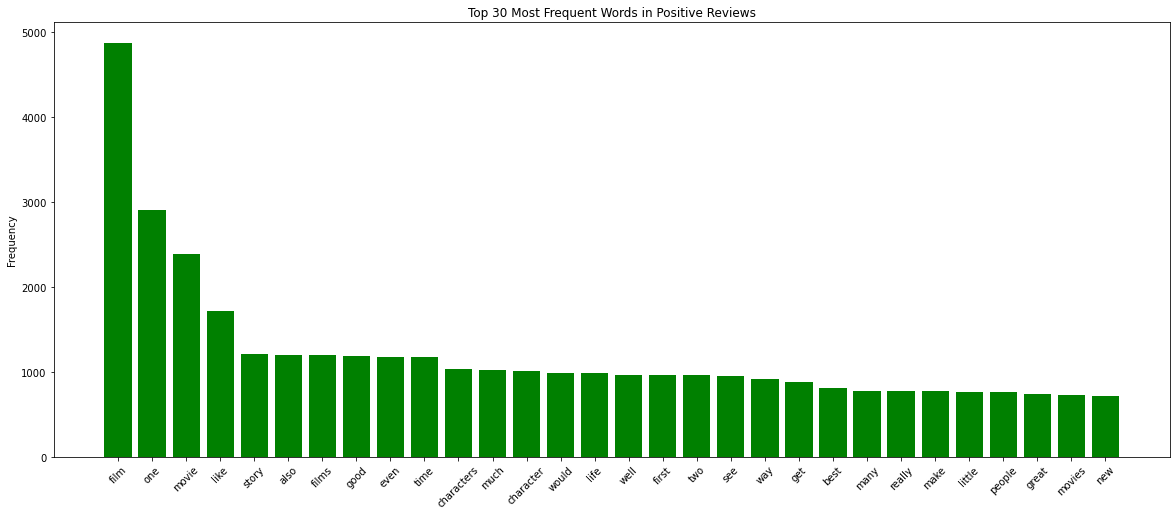

In [6]:
# Find the top 30 words in positive reviews
top_pos_words = combined_df.sort_values(by='POS', ascending=False).head(30)

# Plot for the positive reviews
plt.figure(figsize=(20, 8))
plt.bar(top_pos_words.index, top_pos_words['POS'], color='green')
plt.title('Top 30 Most Frequent Words in Positive Reviews')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Insights from Positive Reviews (Green Plot):
1. Similar Neutral Word Trend: As with negative reviews, the plot shows a prevalence of neutral words that are common in movie discussions.
2. Less Steep Frequency Decay: The decay in word frequency from the most to the least common of the top 30 is less steep compared to the negative reviews. This could indicate a more varied vocabulary in positive reviews.
3. Potential Positive Context: The usage of neutral words in a positive context might be associated with a positive sentiment. For example, a word like "good" in close proximity to "film" or "movie" may indicate a positive review.

## Plot for the negative reviews

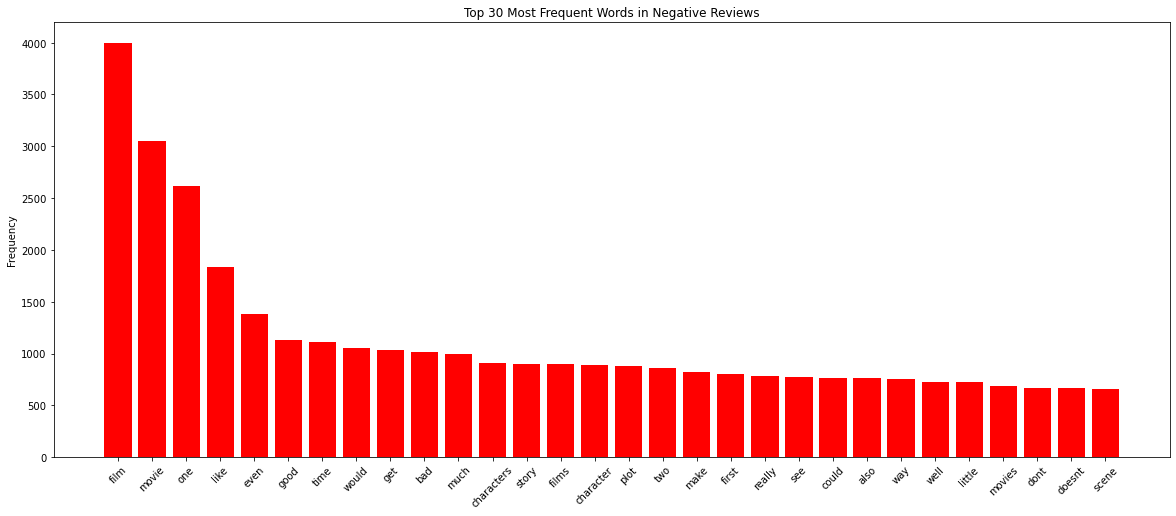

In [7]:
# Find the top 30 words in negative reviews
top_neg_words = combined_df.sort_values(by='NEG', ascending=False).head(30)

# Plot for the negative reviews
plt.figure(figsize=(20, 8))
plt.bar(top_neg_words.index, top_neg_words['NEG'], color='red')
plt.title('Top 30 Most Frequent Words in Negative Reviews')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Insights from Negative Reviews (Red Plot):
1. Commonality of Neutral Words: The most frequent words in negative reviews are generally neutral and could be found in any kind of movie review, like "film," "movie," "like," etc. This indicates that negative sentiment is conveyed through context rather than specific negative words.
2. Frequency Decay: There's a steep decline in frequency from the most common word to the 30th. This suggests a few words are used very frequently, with a long tail of less common words.
3. Contextual Analysis Required: Since the top words are neutral, determining sentiment likely requires analyzing the context in which these words are used, or identifying less frequent but more sentiment-laden words.

# 3. Naïve Bayes Model Training

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [9]:
# Step 1: Combine the DataFrames
df = pd.concat([df_neg, df_pos], ignore_index=True)

# Step 2: Text Cleaning
# Define a function to clean the text
def clean_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply the cleaning function to the 'Text' column
df['Text'] = df['Text'].apply(clean_text)

# Step 3: Vectorization
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the 'Text' and transform the data
X = vectorizer.fit_transform(df['Text'])

# Convert the result to a DataFrame
term_doc_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# Add the label column back to the term-document matrix
term_doc_matrix['Label'] = df['Label'].values  # Using .values to avoid index alignment issues

# Now 'term_doc_matrix' is your term-document matrix with labels
term_doc_matrix.head()

,00,000,0009f,000acre,000aweek,000foot,000paltry,007,007esque,00s,...,zukovsky,zulu,zundel,zurgs,zweibel,zwick,zwicks,zwigoffs,zycie,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEG
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEG
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEG
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEG
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEG


In [10]:
term_doc_matrix.shape

(2000, 47372)

## Data Splitting

In [11]:
# Assuming 'term_doc_matrix' is your DataFrame and 'Label' is the column with sentiment labels
X = term_doc_matrix.drop('Label', axis=1)
y = term_doc_matrix['Label'].apply(lambda x: 1 if x == 'POS' else 0)  # Convert labels to binary

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Selection

In [12]:
# Initialize the Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB()

## Training the Model

In [13]:
# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predictions can be made with nb_classifier.predict(X_test)
# And the model's accuracy can be tested like this:
predictions = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.80%


An accuracy of 82.80% for your Naïve Bayes classifier on the test set is a strong result, especially considering the complexity of natural language processing and sentiment analysis.

# 4. Model Testing

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
predictions = nb_classifier.predict(X_test)

# Calculate the performance metrics
report = classification_report(y_test, predictions, target_names=['NEG', 'POS'])
conf_matrix = confusion_matrix(y_test, predictions)

# Display the classification report
print(report)

# Display the confusion matrix
print(conf_matrix)

              precision    recall  f1-score   support

         NEG       0.84      0.82      0.83       257
         POS       0.82      0.83      0.82       243

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500

[[212  45]
 [ 41 202]]


1. Precision (Positive class: 0.82, Negative class: 0.84): Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The high precision for both classes indicates that the model has a low false positive rate.

2. Recall (Positive class: 0.83, Negative class: 0.82): Recall is the ratio of correctly predicted positive observations to all observations in the actual class. The recall scores are also high, meaning the model is able to identify most of the positive and negative reviews correctly.

3. F1-Score (Positive class: 0.82, Negative class: 0.83): The F1-score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. The F1-score for both classes is quite high, suggesting a good balance between precision and recall.

4. Support: The support is the number of actual occurrences of the class in the specified dataset. Here, it is relatively balanced, which helps in getting a fair assessment of the model's performance.

5. Confusion Matrix: The confusion matrix [212 45; 41 202] shows the distribution of true and false predictions across the two classes. Out of 500 reviews (257 negative, 243 positive):
* 212 were correctly identified as negative (true negatives).
* 202 were correctly identified as positive (true positives).
* 45 positive reviews were incorrectly labeled as negative (false negatives).
* 41 negative reviews were incorrectly labeled as positive (false positives).

This implies that the model is slightly better at identifying negative reviews than positive ones, which could be due to specific language cues that are more distinctive or prevalent in negative reviews.

In [16]:
# Get the feature names from the vectorizer
feature_names = np.array(vectorizer.get_feature_names())

# Get the log probability of each feature given each class
log_prob = nb_classifier.feature_log_prob_

# Compute the ratio of probabilities between positive and negative for each feature
# To prevent division by zero, we can add a small value to the denominator
feature_ratio = log_prob[1] - log_prob[0]  # Log of the ratio of probabilities

# Sort the indices of the features by the log probability ratio
sorted_indices = np.argsort(feature_ratio)

# Get the top 30 features indicating positive sentiment
top_pos_indices = sorted_indices[-30:]
top_pos_features = feature_names[top_pos_indices]

# Get the top 30 features indicating negative sentiment
top_neg_indices = sorted_indices[:30]
top_neg_features = feature_names[top_neg_indices]

# Display the top 30 features for the positive class
print("Top 30 informative features for positive class:")
print(top_pos_features)

# Display the top 30 features for the negative class
print("Top 30 informative features for negative class:")
print(top_neg_features)

Top 30 informative features for positive class:
['dolores' 'argento' 'ellie' 'flynts' 'elliot' 'bold' 'lumumba' 'lola'
 'maximus' 'farquaad' 'feihong' 'jedi' 'coens' 'giles' 'cauldron'
 'lambeau' 'donkey' 'apostle' 'sweetback' 'mallory' 'hedwig' 'gattaca'
 'taran' 'mulan' 'leila' 'guido' 'trumans' 'ordell' 'shrek' 'flynt']
Top 30 informative features for negative class:
['nbsp' 'seagal' 'schumacher' 'werewolf' 'brenner' '1900' 'oldman' 'bye'
 'eszterhas' 'supergirl' 'raider' 'bilko' 'jericho' 'psychlos' 'hawk'
 'highlander' 'macdonald' 'hush' 'jolie' 'jill' 'illogical' 'geronimo'
 'sphere' 'ho' 'cigarettes' 'yawn' 'macleane' 'jakob' 'croft' 'psychlo']


### Positive Class Features:
Words like "maximus" (possibly referring to the movie "Gladiator"), "jedi" (from "Star Wars"), "mulan", and character names like "donkey" and "shrek" suggest that certain successful movies or characters are commonly discussed in positive reviews. Additionally, the presence of names such as "coens" (possibly referring to the Coen brothers, filmmakers known for acclaimed movies) indicates that specific filmmakers are associated with positive sentiments.

Unique or specific names like "dolores", "ellie", "flynts", and "guido" might be referencing specific films or characters that were well-received. This indicates that the positive sentiment is often tied to specific elements of a movie that leave a strong impression on viewers.

### Negative Class Features:
On the other hand, negative reviews seem to be characterized by a different set of names and terms. For example, "seagal" (likely referring to actor Steven Seagal) and "schumacher" (perhaps director Joel Schumacher) could indicate that certain public figures are associated with negative reviews. "Werewolf" might be related to a particular movie that was not well-received, and terms like "ho" and "yawn" suggest a more explicitly negative sentiment.

The term "nbsp" is an anomaly; it's a non-breaking space in HTML and could indicate issues with data cleaning or encoding.

The specific movie or character names such as "supergirl", "raider", and "croft" (likely referring to "Lara Croft") appearing in the negative features suggest that these movies or characters were mentioned often in a negative context within this dataset.

### Insights and Considerations:
The presence of specific character and film names in the top informative features indicates that the classifier may be heavily influenced by the dataset's specific content. This can be both good and bad:

* Good: The classifier can pick up on specific nouns (names) that are strongly associated with sentiments.
* Bad: The classifier may not generalize well to new movies or characters that weren't in the training set, as it has learned to associate sentiment with names rather than descriptive language.

Moreover, while these features give us valuable insight into what the classifier has learned, they also highlight the limitations of using a bag-of-words model like Naïve Bayes for sentiment analysis. It does not capture the context in which these words are used. For example, "shrek" might be used in a sentence like "not as good as Shrek", which is a comparative negative sentiment, but the model might incorrectly associate it with positive reviews.

The presence of feature names that do not seem to carry an inherent positive or negative sentiment suggests that the classifier's performance might be relying on idiosyncrasies in the dataset rather than learning generalizable sentiment-related patterns. This could potentially limit the model's applicability to other domains or wider ranges of text.

In [17]:
unseen_review = """There were some things I didn't like about this film. Here's what I remember most
strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the
"bear" from Hercules in New York); an extra with a less than believable laugh; an ex-drug
addict martian with tics; child actors who recite their lines very slowly and carefully;
a newspaper headline declaring that Santa has been "kidnapped", and a giant robot. The
least appealing acting job in the film must be when Mother Claus and her elves have been
"frozen" by the "Martians'" weapons. They seemed to display an exaggerated amount of
fear. Perhaps this was the preferred acting style in the 1960's??"""

In [18]:
# Clean the unseen review text
clean_unseen_review = clean_text(unseen_review)

# Vectorize the unseen review using the same vectorizer used during training
# It's important to use transform() and NOT fit_transform() which is for training
unseen_review_vectorized = vectorizer.transform([clean_unseen_review])

# Predict the sentiment of the unseen review
unseen_review_prediction = nb_classifier.predict(unseen_review_vectorized)

# Convert the prediction back to a sentiment label
predicted_sentiment = 'POS' if unseen_review_prediction[0] == 1 else 'NEG'

predicted_sentiment

'POS'

The classifier's prediction of 'POS' for the given review, which is actually slightly negative, is an incorrect classification. This misclassification could be due to several factors, as discussed previously:

1. Subtlety and Context: The review's language is subtle in its negativity. It mentions aspects of the film that the viewer did not like, but without using strongly negative language. Naïve Bayes classifiers can sometimes struggle with understanding context and subtlety, especially when negative sentiments are expressed without explicit negative words.

2. Sarcasm and Humor: The mention of a "funny" polar bear costume and other elements that are humorously described might be misleading the classifier. Sarcasm and humor can be difficult for algorithms to interpret correctly, particularly when they rely on bag-of-words approaches that do not consider the broader context or tone.

3. Neutral Words with Negative Connotations: The review contains several neutral words ("man", "bear", "costume", "laugh", "martian") that are associated with negative connotations in this context. Since Naïve Bayes treats each word independently, the model may not pick up on the negative connotations without the presence of more explicit negative words.

4. Lack of Negation Handling: The classifier might not be able to effectively handle negations or diminishers like "less than believable," which soften the negativity or flip the sentiment of the words that follow.

5. Training Data Limitations: If the training data didn't contain enough examples of similar sentiment expression, the model might not be well-tuned to recognize such instances. The classifier is only as good as the data it was trained on, and if the dataset lacks diversity in sentiment expression, the model might not generalize well.

6. Feature Weighting: The most informative features identified might not have included nuanced indicators of negativity, which can lead to misclassifications when such nuances are pivotal.

To improve the classifier's performance on such nuanced reviews, you could consider the following steps:

* Expand the Training Data: Include a wider variety of reviews with subtle and complex sentiment expressions.
* Use N-Grams: Incorporate bi-grams or tri-grams to capture phrases that indicate sentiment.
* Advanced Techniques: Apply more advanced NLP techniques, such as sentiment analysis using neural networks, which can better understand the context and complexities of language.
* Feature Engineering: Include features that specifically capture negations and modifiers.

Misclassifications like this one provide valuable feedback and can be used to refine the model further. Identifying where the model goes wrong is a critical step in the iterative process of improving machine learning models.

# 5. Conclusions

In [5]:
# Step 1: Combine the DataFrames
df = pd.concat([df_neg, df_pos], ignore_index=True)
df

,Text,Label
0,bad . bad . \nbad . \nthat one word seems to p...,NEG
1,isn't it the ultimate sign of a movie's cinema...,NEG
2,""" gordy "" is not a movie , it is a 90-minute-...",NEG
3,disconnect the phone line . \ndon't accept the...,NEG
4,when robert forster found himself famous again...,NEG
...,...,...
1995,one of the funniest carry on movies and the th...,POS
1996,"i remember making a pact , right after `patch ...",POS
1997,barely scrapping by playing at a nyc piano bar...,POS
1998,if the current trends of hollywood filmmaking ...,POS


In [6]:
# Step 2: Text Cleaning
# Define a function to clean the text
def clean_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply the cleaning function to the 'Text' column
df['Text'] = df['Text'].apply(clean_text)
df

,Text,Label
0,bad bad bad one word seems pretty much sums be...,NEG
1,isnt ultimate sign movies cinematic ineptitude...,NEG
2,gordy movie 90minutelong sesame street skit ba...,NEG
3,disconnect phone line dont accept charges anyt...,NEG
4,robert forster found famous appearing jackie b...,NEG
...,...,...
1995,one funniest carry movies third medical settin...,POS
1996,remember making pact right patch adams easily ...,POS
1997,barely scrapping playing nyc piano bar timothy...,POS
1998,current trends hollywood filmmaking continue p...,POS


In [7]:
# Step 3: Vectorization
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the 'Text' and transform the data
X = vectorizer.fit_transform(df['Text'])

# Convert the result to a DataFrame
term_doc_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# Add the label column back to the term-document matrix
term_doc_matrix['Label'] = df['Label'].values  # Using .values to avoid index alignment issues

# Now 'term_doc_matrix' is your term-document matrix with labels
term_doc_matrix.head()

,00,000,0009f,000acre,000aweek,000foot,000paltry,007,007esque,00s,...,zukovsky,zulu,zundel,zurgs,zweibel,zwick,zwicks,zwigoffs,zycie,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEG
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEG
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEG
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEG
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEG


In [ ]:
# Step 1: Combine the DataFrames
df = pd.concat([df_neg, df_pos], ignore_index=True)

# Step 2: Text Cleaning
# Define a function to clean the text
def clean_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply the cleaning function to the 'Text' column
df['Text'] = df['Text'].apply(clean_text)

# Step 3: Vectorization
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the 'Text' and transform the data
X = vectorizer.fit_transform(df['Text'])

# Convert the result to a DataFrame
term_doc_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# Add the label column back to the term-document matrix
term_doc_matrix['Label'] = df['Label'].values  # Using .values to avoid index alignment issues

# Now 'term_doc_matrix' is your term-document matrix with labels
print(term_doc_matrix.head())

In [5]:
df_neg

,Text,Label
0,bad . bad . \nbad . \nthat one word seems to p...,NEG
1,isn't it the ultimate sign of a movie's cinema...,NEG
2,""" gordy "" is not a movie , it is a 90-minute-...",NEG
3,disconnect the phone line . \ndon't accept the...,NEG
4,when robert forster found himself famous again...,NEG
...,...,...
995,synopsis : when a meteorite crashlands in the ...,NEG
996,it's now the anniversary of the slayings of ju...,NEG
997,coinciding with the emerging popularity of mov...,NEG
998,and now the high-flying hong kong style of fil...,NEG


In [6]:
df_pos

,Text,Label
0,assume nothing . \nthe phrase is perhaps one o...,POS
1,plot : derek zoolander is a male model . \nhe ...,POS
2,i actually am a fan of the original 1961 or so...,POS
3,a movie that's been as highly built up as the ...,POS
4,""" good will hunting "" is two movies in one : ...",POS
...,...,...
995,one of the funniest carry on movies and the th...,POS
996,"i remember making a pact , right after `patch ...",POS
997,barely scrapping by playing at a nyc piano bar...,POS
998,if the current trends of hollywood filmmaking ...,POS


In [7]:
all_reviews = pd.concat([df_neg, df_pos], axis=0)
all_reviews

,Text,Label
0,bad . bad . \nbad . \nthat one word seems to p...,NEG
1,isn't it the ultimate sign of a movie's cinema...,NEG
2,""" gordy "" is not a movie , it is a 90-minute-...",NEG
3,disconnect the phone line . \ndon't accept the...,NEG
4,when robert forster found himself famous again...,NEG
...,...,...
995,one of the funniest carry on movies and the th...,POS
996,"i remember making a pact , right after `patch ...",POS
997,barely scrapping by playing at a nyc piano bar...,POS
998,if the current trends of hollywood filmmaking ...,POS


In [8]:
# Define a function to clean the text
def clean_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply the cleaning function to the 'Text' column
all_reviews['Text'] = all_reviews['Text'].apply(clean_text)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the 'Text' and transform the data
X = vectorizer.fit_transform(all_reviews['Text'])

# Convert the result to a DataFrame
term_doc_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# Add the label column back to the term-document matrix
# Ensure that the 'Label' column is directly from the 'df' DataFrame
term_doc_matrix['Label'] = all_reviews['Label'].values  # Using .values to avoid index alignment issues

# Now 'term_doc_matrix' is your term-document matrix with labels
term_doc_matrix.head()

,00,000,0009f,000acre,000aweek,000foot,000paltry,007,007esque,00s,...,zukovsky,zulu,zundel,zurgs,zweibel,zwick,zwicks,zwigoffs,zycie,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
